In [1]:
from shared import *
purchases_df = get_wearable_purchases_df()
wearable_types_df = get_wearable_types_df()
purchases_types_df = get_wearables_purchases_types_df(wearable_types_df, purchases_df)

## Wearables Sales Prices

In [2]:
column_name_mappings = {'name': 'Wearable', 'price': 'Median Price (GHST)', 'rarity': 'Rarity', 'slotNames': 'Slot(s)', 'datePurchased': 'Date', 'startOfWeekPurchased': 'Week', 'yearMonthPurchased': 'Month', 'lastPrice': 'Last Sale Price (GHST)', 'marketCap': 'Market Cap (GHST)', 'maxQuantity': 'Total Supply'}

def get_median_price_by_column(column_name):
    return purchases_types_df.pivot_table(index=column_name,values=['price'],aggfunc=np.median,margins=False).reset_index().rename(columns=column_name_mappings)


price_by_name_df = get_median_price_by_column('name')
price_by_slot_df = get_median_price_by_column('slotNames')
price_by_rarity_df = get_median_price_by_column('rarity')
price_by_month_df = get_median_price_by_column('yearMonthPurchased')[:-1]
price_by_month_rarity_df = purchases_types_df.pivot_table(index='yearMonthPurchased', columns='rarity', values=['price'],aggfunc=np.median,margins=False).reset_index().rename(columns=column_name_mappings).fillna(0)[:-1]

### Median Price by Month and Rarity

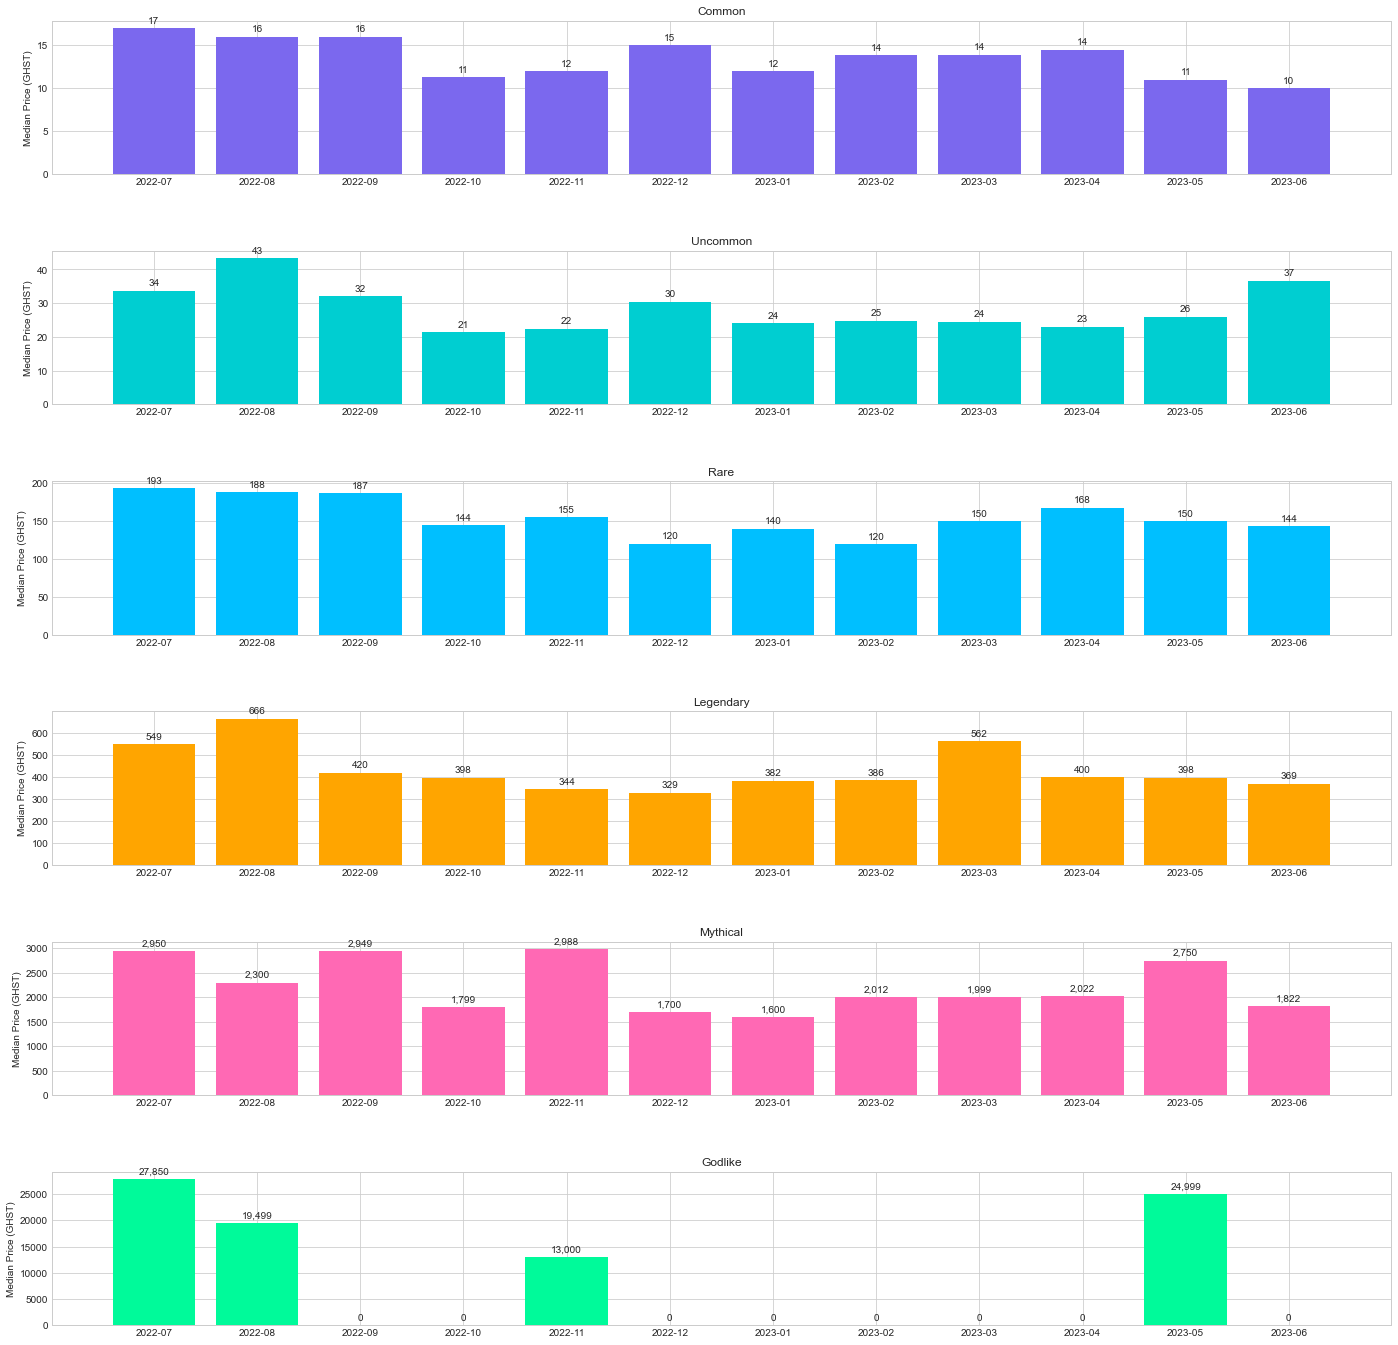

In [3]:
fig, axes = plt.subplots(6)
fig.set_size_inches(24,24)
fig.subplots_adjust(hspace=0.5)
# titles
xcol = column_name_mappings['yearMonthPurchased']
ycol = column_name_mappings['price']
rarities = ['common', 'uncommon', 'rare', 'legendary', 'mythical', 'godlike']
months = price_by_month_df[xcol]
for i in range(0,len(rarities)):
    rarity = rarities[i]
    ax = axes[i]
    ax.set_title("{r}".format(r=rarity).capitalize())
    ax.set_ylabel(ycol)
    bars = ax.bar(price_by_month_rarity_df[xcol], price_by_month_rarity_df[ycol][rarity], color=get_rarity_color(rarity))
    for b in bars:
        height = b.get_height()
        ax.annotate('{:,.0f}'.format(height),
        xy=(b.get_x() + b.get_width() / 2, height),
        xytext=(0, 3), # 3 points vertical offset
        textcoords="offset points",
        ha='center', va='bottom')            

### Median Price by Wearable

In [4]:
show_itable_long(price_by_name_df, order=[[1, 'asc']])

### Median Price by Slot

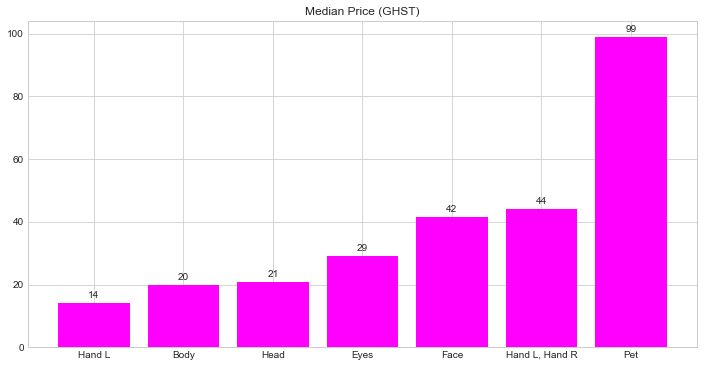

In [5]:
fig, ax = get_bar_charts(price_by_slot_df.sort_values(column_name_mappings['price']), column_name_mappings['slotNames'], [column_name_mappings['price']], [GHST_COLOR])

### Median Price by Rarity

In [6]:
show_itable(price_by_rarity_df, order=[[1, 'asc']])